In [1]:
import numpy as np
import matplotlib.pyplot as plt
from clustertools.load_data import load_spiral_data, load_aggregation_data, load_birch1_data, load_birch3_data, load_compound_data, load_flame_data, load_pathbased_data, load_sets_data, load_fuzzy_data
%matplotlib inline

### Data sets

(-48365.855026881727,
 1045844.8550268818,
 -50000.006070640178,
 1050000.0060706402)

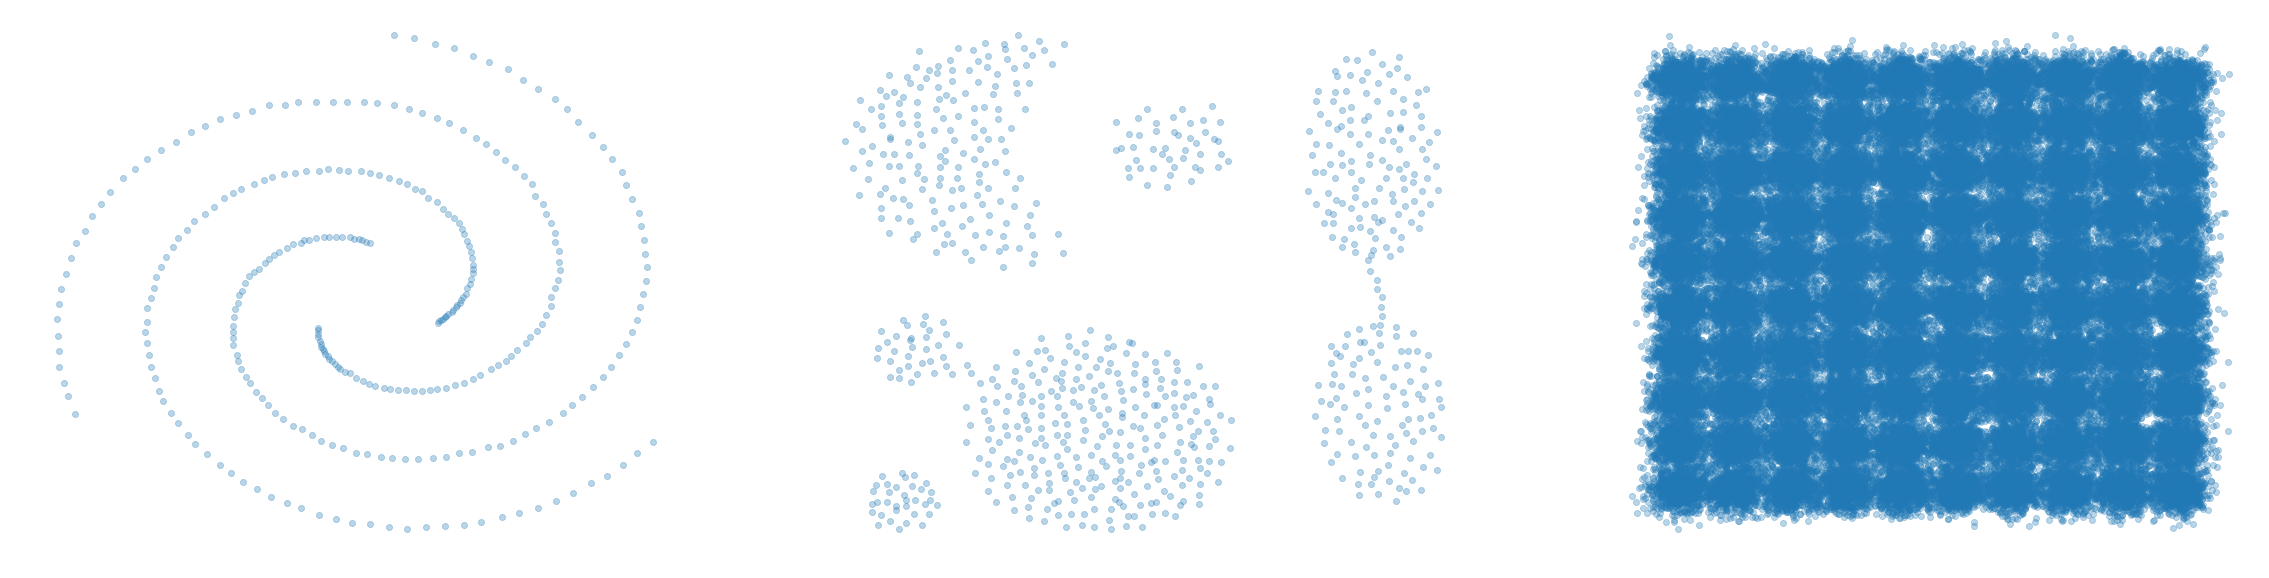

In [2]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

spiral=load_spiral_data()
axarr[0].scatter(spiral[:,0],spiral[:,1],alpha=.3)
axarr[0].axis('off')

aggr=load_aggregation_data()
axarr[1].scatter(aggr[:,0],aggr[:,1],alpha=.3)
axarr[1].axis('off')

birch1=load_birch1_data()
axarr[2].scatter(birch1[:,0],birch1[:,1],alpha=.3)
axarr[2].axis('off')

(-0.19002688172043003,
 14.890026881720431,
 13.776429359823398,
 28.473570640176607)

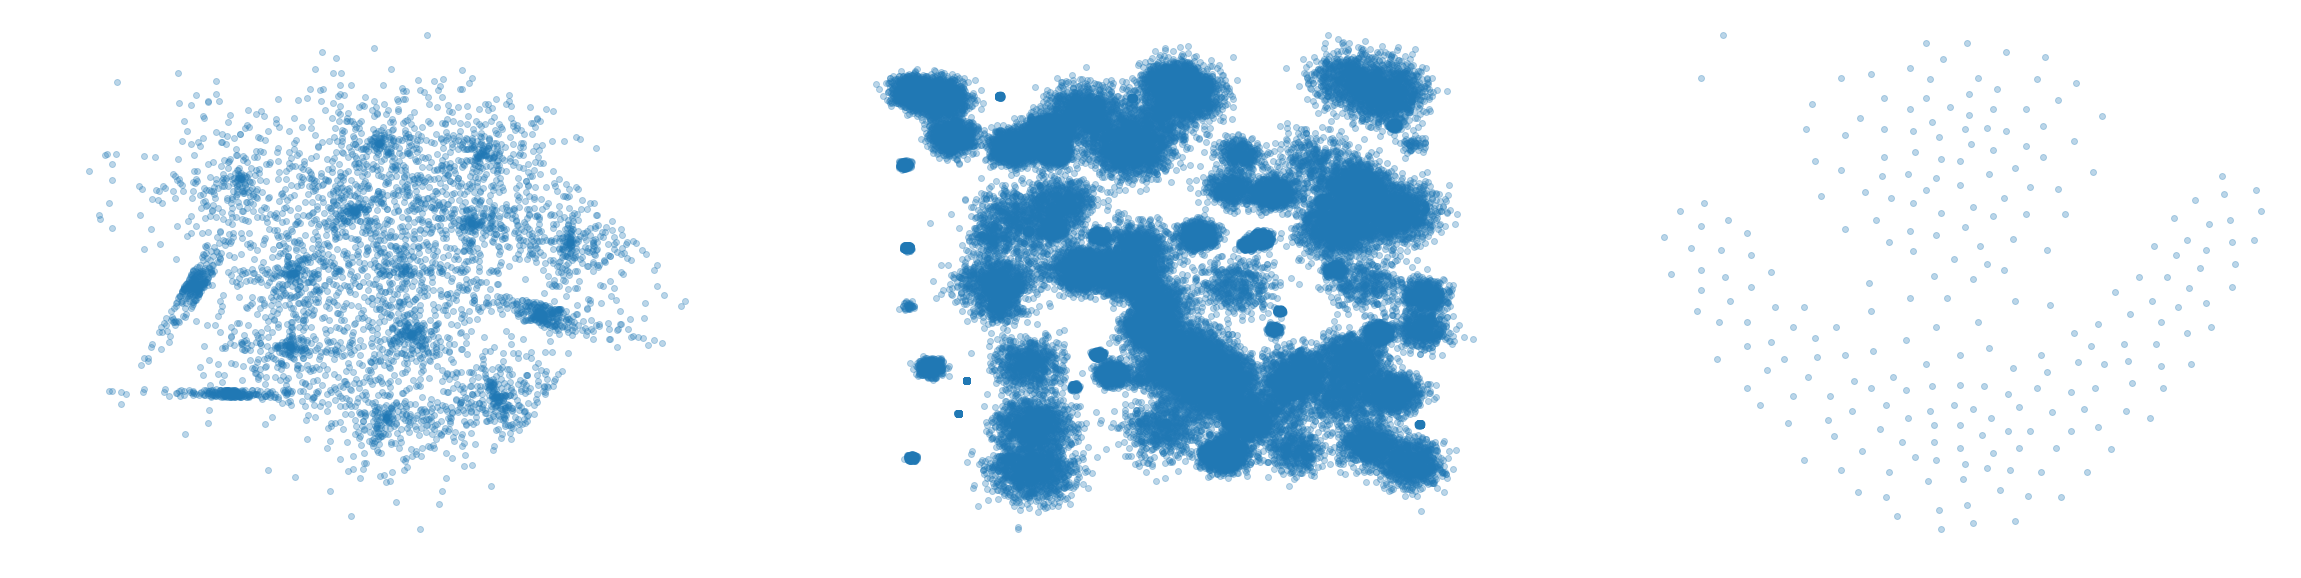

In [3]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

sets=load_sets_data()
axarr[0].scatter(sets[:,0],sets[:,1],alpha=.3)
axarr[0].axis('off')

birch3=load_birch3_data()
axarr[1].scatter(birch3[:,0],birch3[:,1],alpha=.3)
axarr[1].axis('off')

flame=load_flame_data()
axarr[2].scatter(flame[:,0],flame[:,1],alpha=.3)
axarr[2].axis('off')

(3.2774731182795707,
 34.472526881720427,
 2.2389293598233997,
 33.161070640176604)

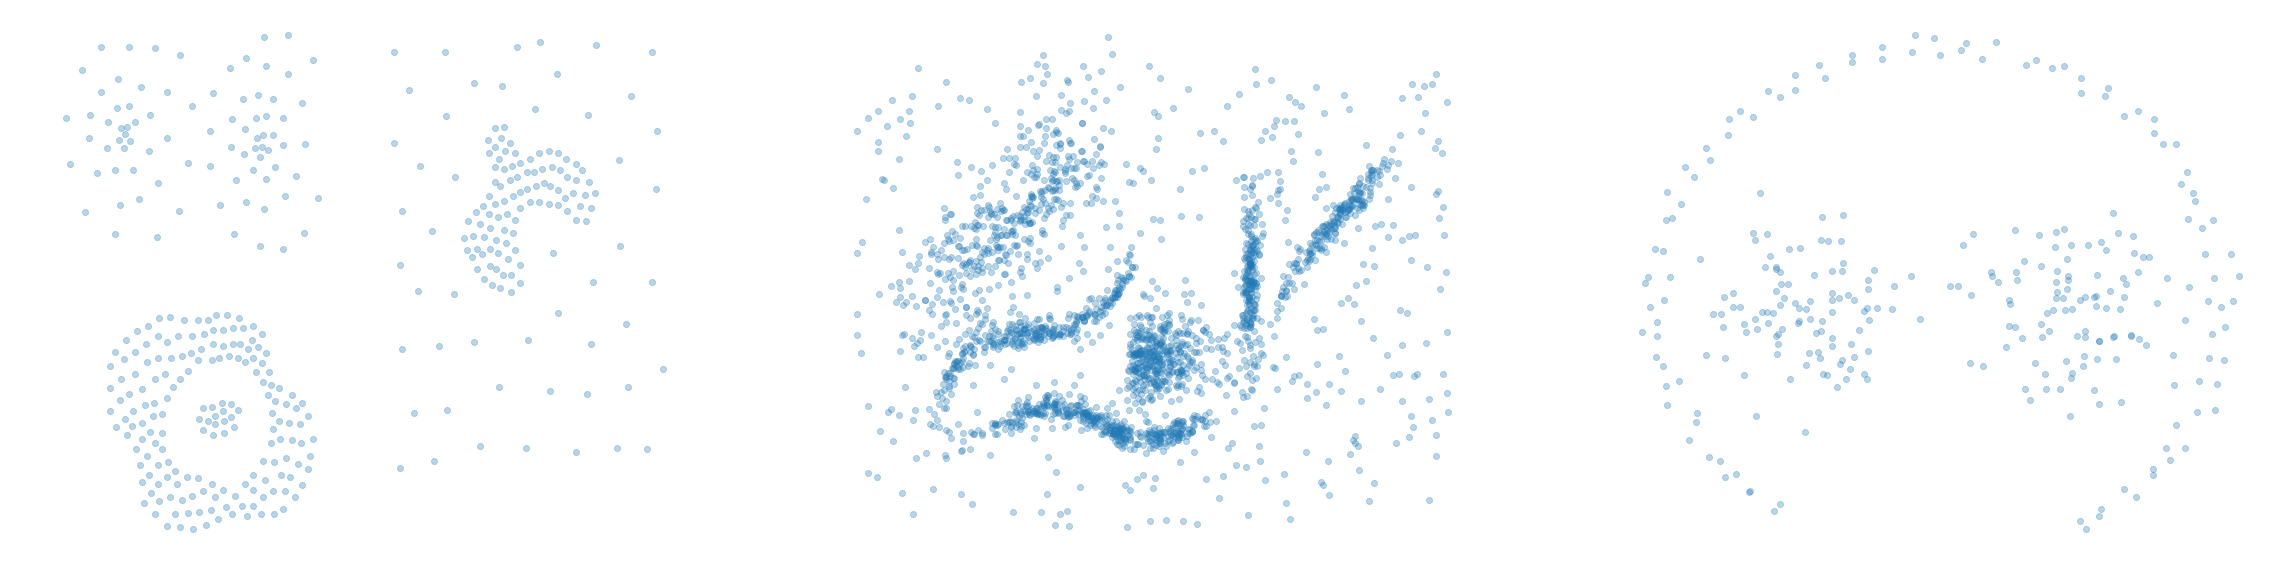

In [4]:
f, axarr = plt.subplots(1,3, figsize=(40,10))

compound = load_compound_data()
axarr[0].scatter(compound[:,0],compound[:,1],alpha=.3)
axarr[0].axis('off')

fuzzy = load_fuzzy_data()
axarr[1].scatter(fuzzy[:,0],fuzzy[:,1],alpha=.3)
axarr[1].axis('off')

pathbased = load_pathbased_data()
axarr[2].scatter(pathbased[:,0],pathbased[:,1],alpha=.3)
axarr[2].axis('off')


### Mean Shift Algorithm

In [12]:
from clustertools.models.MeanShift import MeanShift, plot_kde

datasets = [10*fuzzy[np.arange(0,2309,5),:], aggr[:,:2], flame, pathbased, compound[:,:2], 0.0001*birch3[np.arange(0,100000,100),:]]
bandwidthset = [ 0.6, 1.8, 1.4, 1.8, 1.5, 7]#results are very much dependent on bandwidth

126 iterations until termination.
used bandwidth: 0.600000
Finished after 0:00:01.823862
number of cluster found: 9.000000
max within cluster distance to center: 0.011520
mean within cluster distance to center: 0.002510
sum of within cluster squared errors: 0.005067


(-4.7358769634677493,
 5.9553065755418881,
 -4.9870763631599164,
 5.5457221566046133)

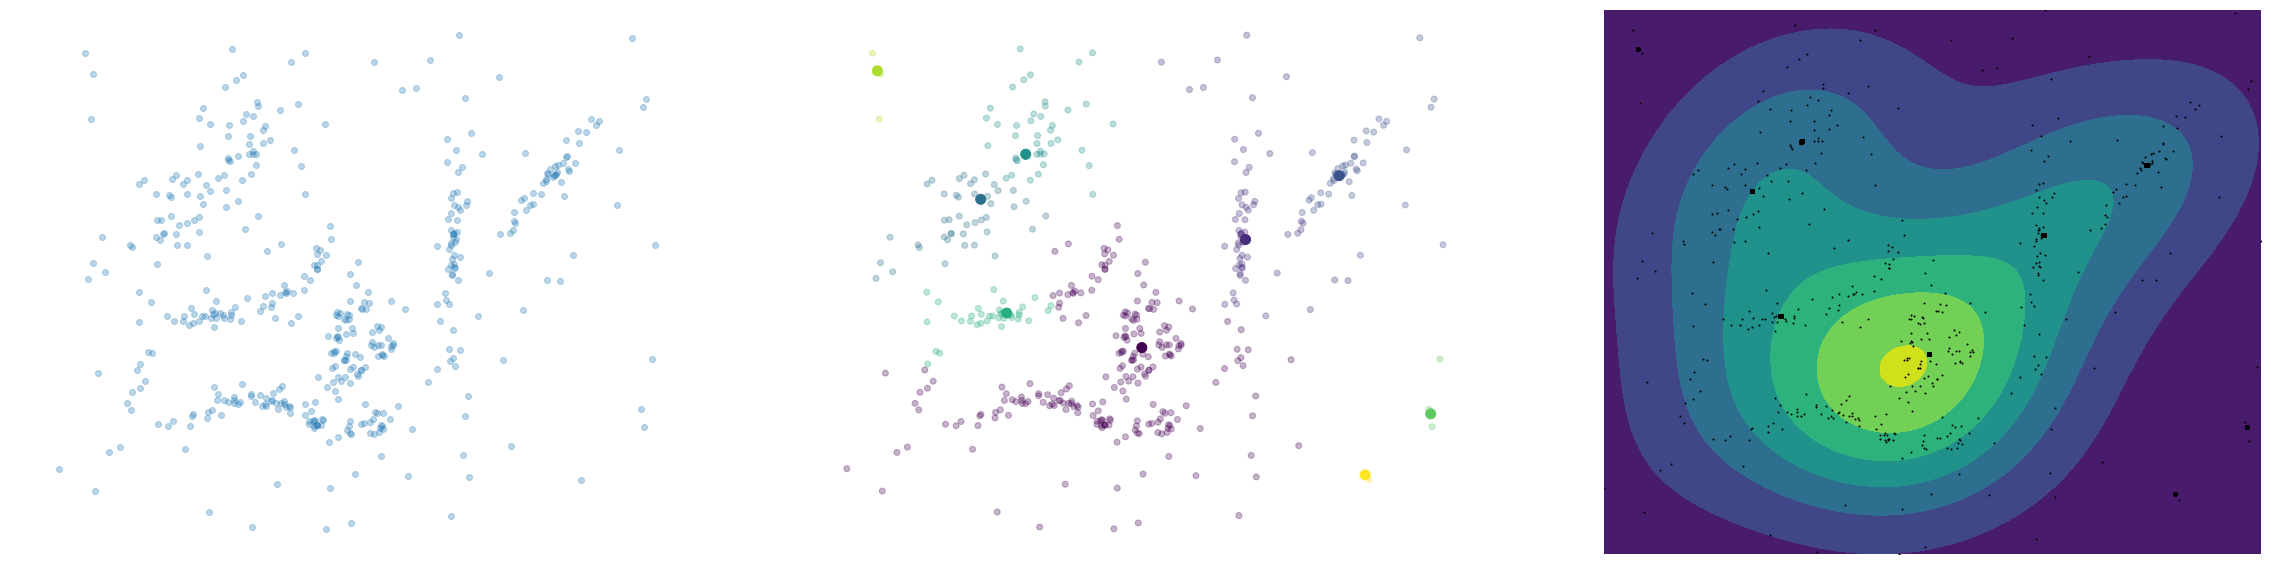

In [6]:
i=0
value = datasets[i]
ms0 = MeanShift(value, bandwidthset[i])
ms0.fit()
clusterlocations = ms0._cluster_centers
results = ms0._results
labels = ms0._cluster_labels
    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(value[:,0],value[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(value[:,0],value[:,1],alpha=.3, c = labels)
axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(value[:,0], value[:,1], bandwidthset[i])  
axarr[2].contourf(X,Y,Z)
axarr[2].plot(value[:,0], value[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

150 iterations until termination.
used bandwidth: 1.800000
Finished after 0:00:10.066975
number of cluster found: 7.000000
max within cluster distance to center: 1.067580
mean within cluster distance to center: 0.323062
sum of within cluster squared errors: 229.101409


(3.3500000000000001, 36.549999999999997, 1.95, 29.149999999999999)

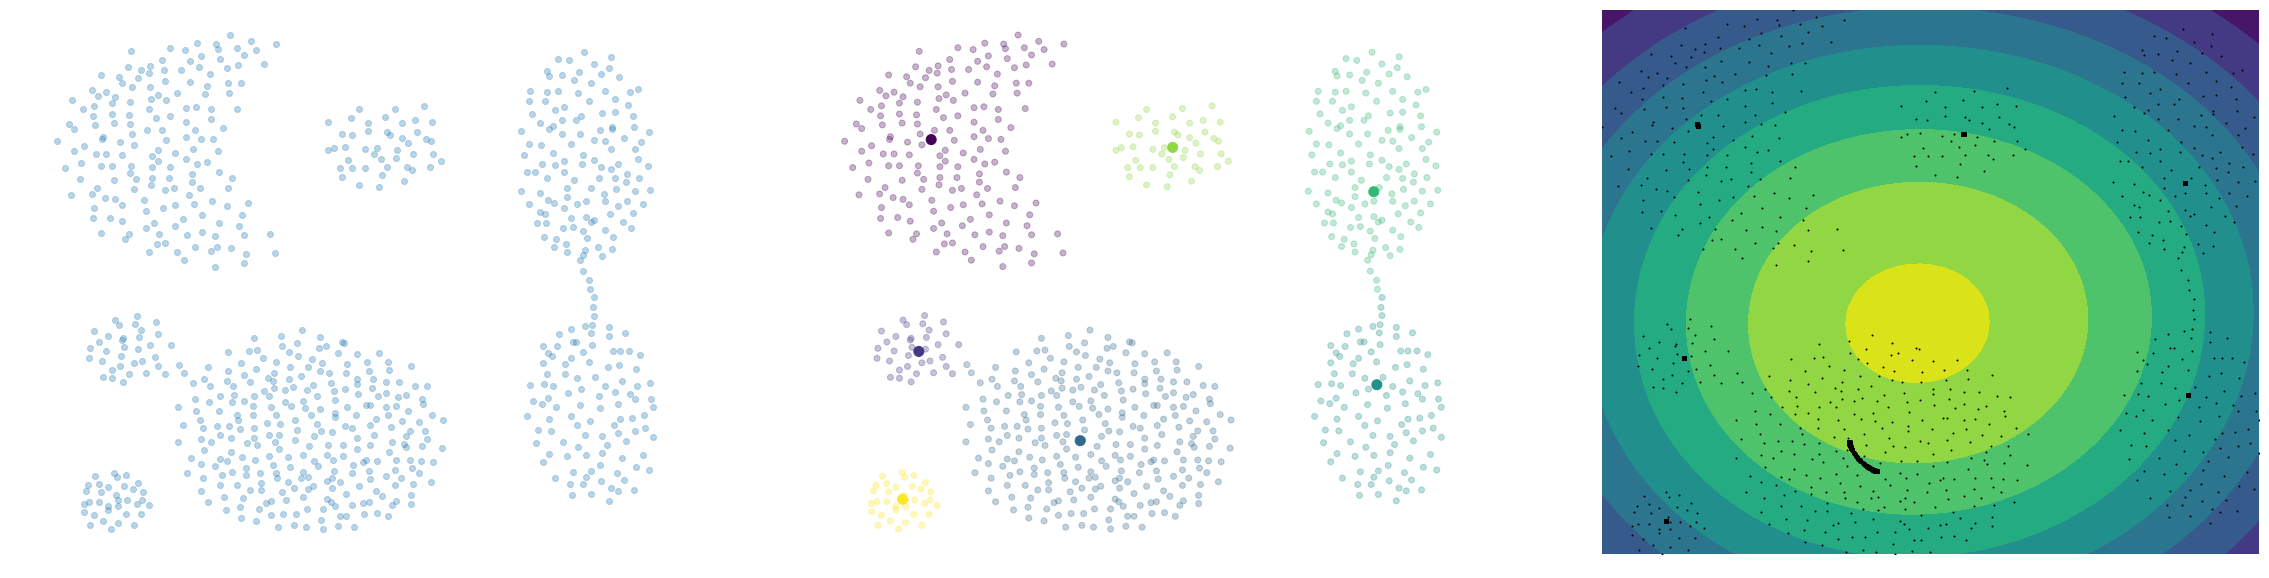

In [13]:
i=1
value = datasets[i]
ms1 = MeanShift(value, bandwidthset[i])
ms1.fit()
clusterlocations = ms1._cluster_centers
results = ms1._results
labels = ms1._cluster_labels
    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(value[:,0],value[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(value[:,0],value[:,1],alpha=.3, c = labels)
axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(value[:,0], value[:,1], bandwidthset[i])  
axarr[2].contourf(X,Y,Z)
axarr[2].plot(value[:,0], value[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

81 iterations until termination.
used bandwidth: 1.400000
Finished after 0:00:00.990296
number of cluster found: 2.000000
max within cluster distance to center: 0.004204
mean within cluster distance to center: 0.003300
sum of within cluster squared errors: 0.002717


(0.5, 14.200000000000001, 14.449999999999999, 27.800000000000001)

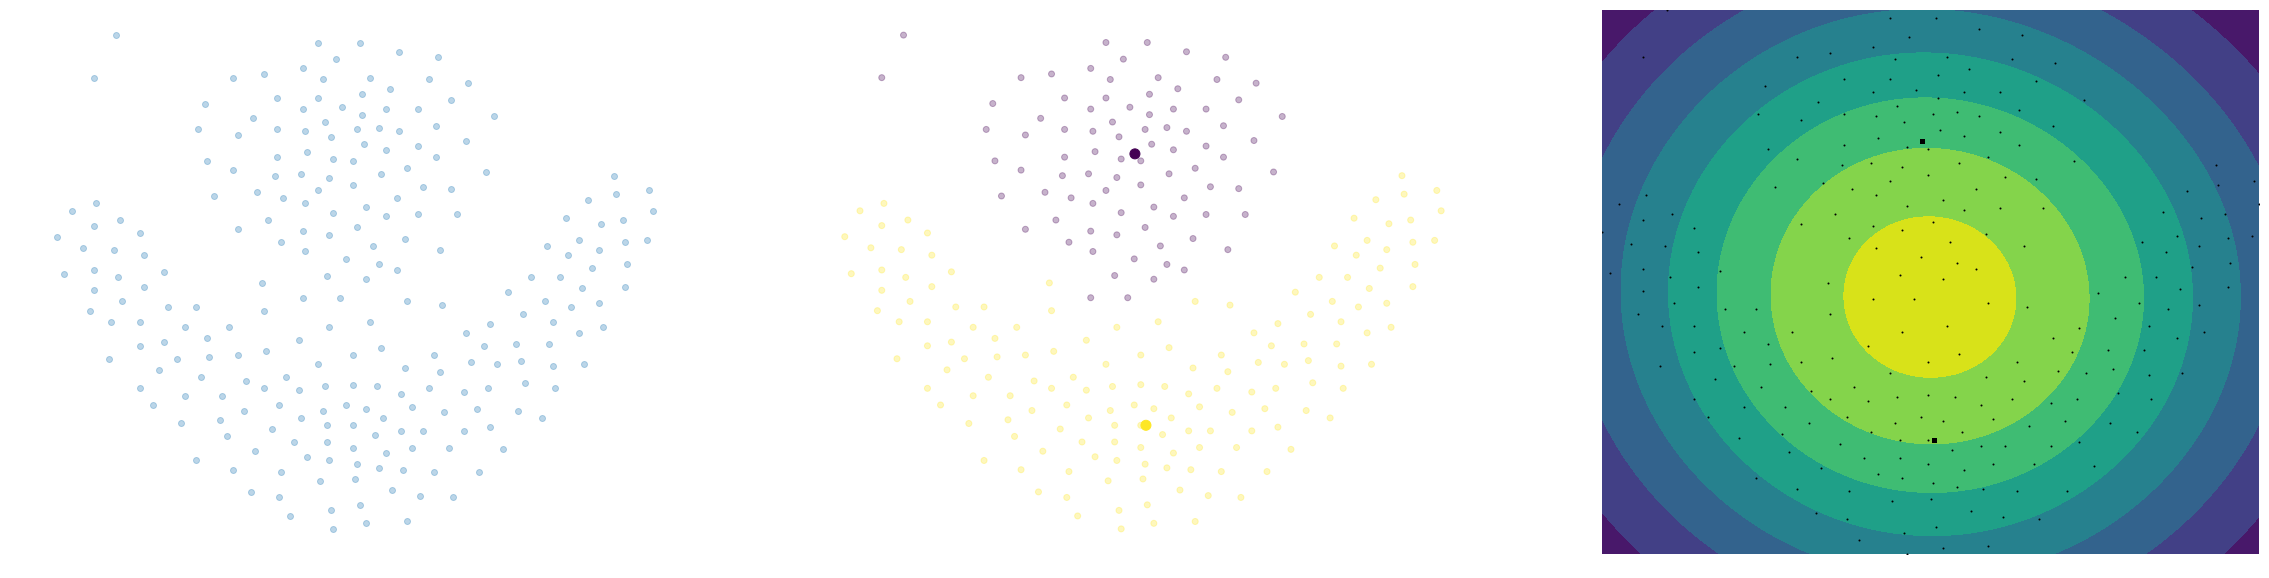

In [8]:
i=2
value = datasets[i]
ms2 = MeanShift(value, bandwidthset[i])
ms2.fit()
clusterlocations = ms2._cluster_centers
results = ms2._results
labels = ms2._cluster_labels
    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(value[:,0],value[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(value[:,0],value[:,1],alpha=.3, c = labels)
axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(value[:,0], value[:,1], bandwidthset[i])  
axarr[2].contourf(X,Y,Z)
axarr[2].plot(value[:,0], value[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

150 iterations until termination.
used bandwidth: 1.800000
Finished after 0:00:01.326985
number of cluster found: 8.000000
max within cluster distance to center: 0.056765
mean within cluster distance to center: 0.004421
sum of within cluster squared errors: 0.018121


(4.7000000000000002, 33.049999999999997, 3.6499999999999999, 31.75)

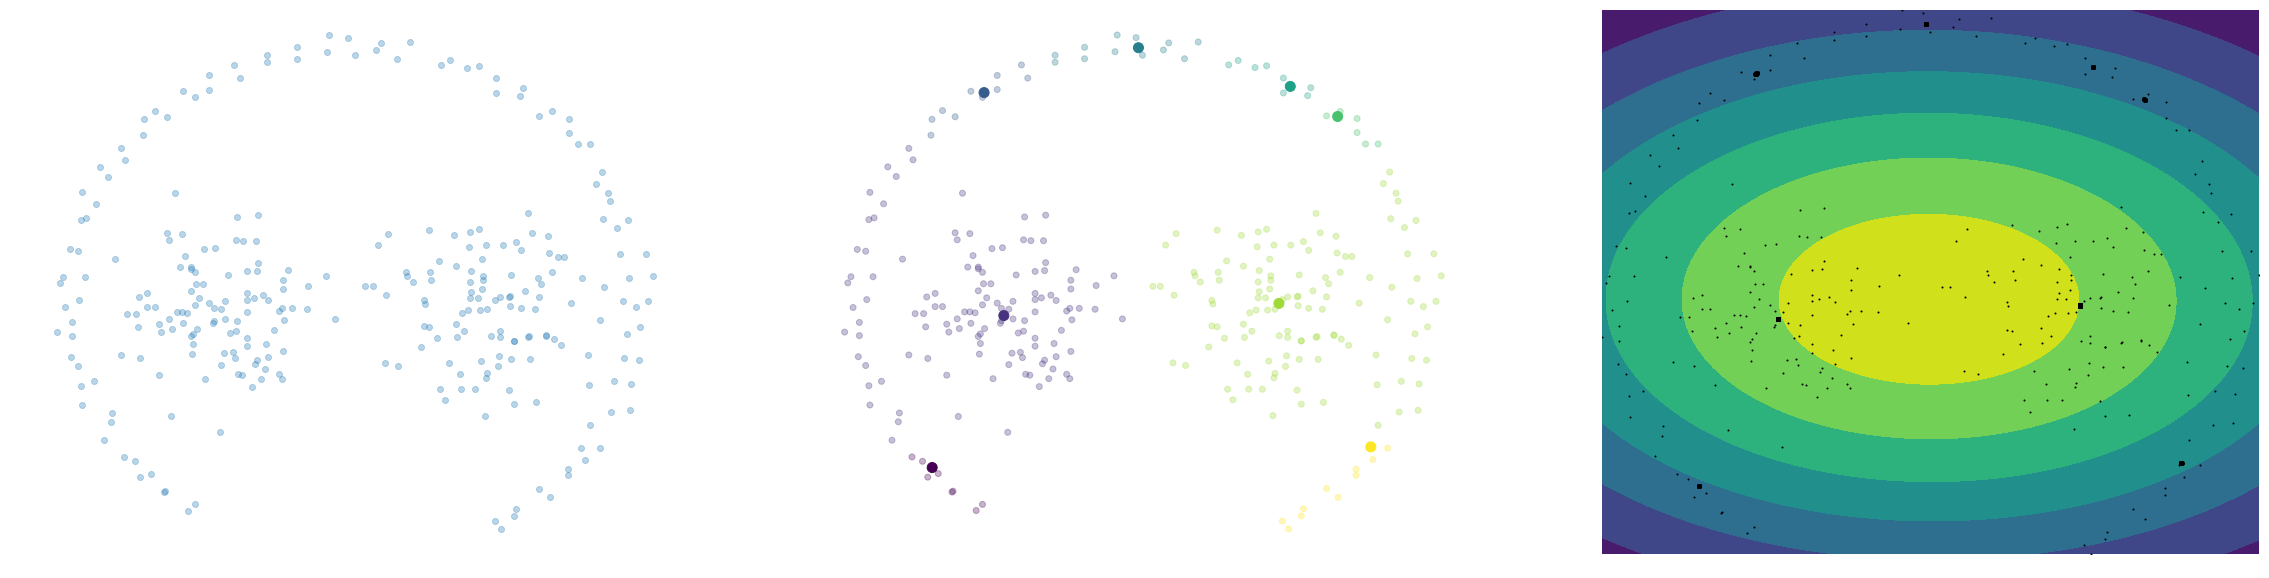

In [9]:
i=3
value = datasets[i]
ms3 = MeanShift(value, bandwidthset[i])
ms3.fit()
clusterlocations = ms3._cluster_centers
results = ms3._results
labels = ms3._cluster_labels
    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(value[:,0],value[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(value[:,0],value[:,1],alpha=.3, c = labels)
axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(value[:,0], value[:,1], bandwidthset[i])  
axarr[2].contourf(X,Y,Z)
axarr[2].plot(value[:,0], value[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')

136 iterations until termination.
used bandwidth: 1.500000
Finished after 0:00:01.845615
number of cluster found: 6.000000
max within cluster distance to center: 0.010549
mean within cluster distance to center: 0.004269
sum of within cluster squared errors: 0.009414


(7.1500000000000004, 42.899999999999999, 5.75, 22.75)

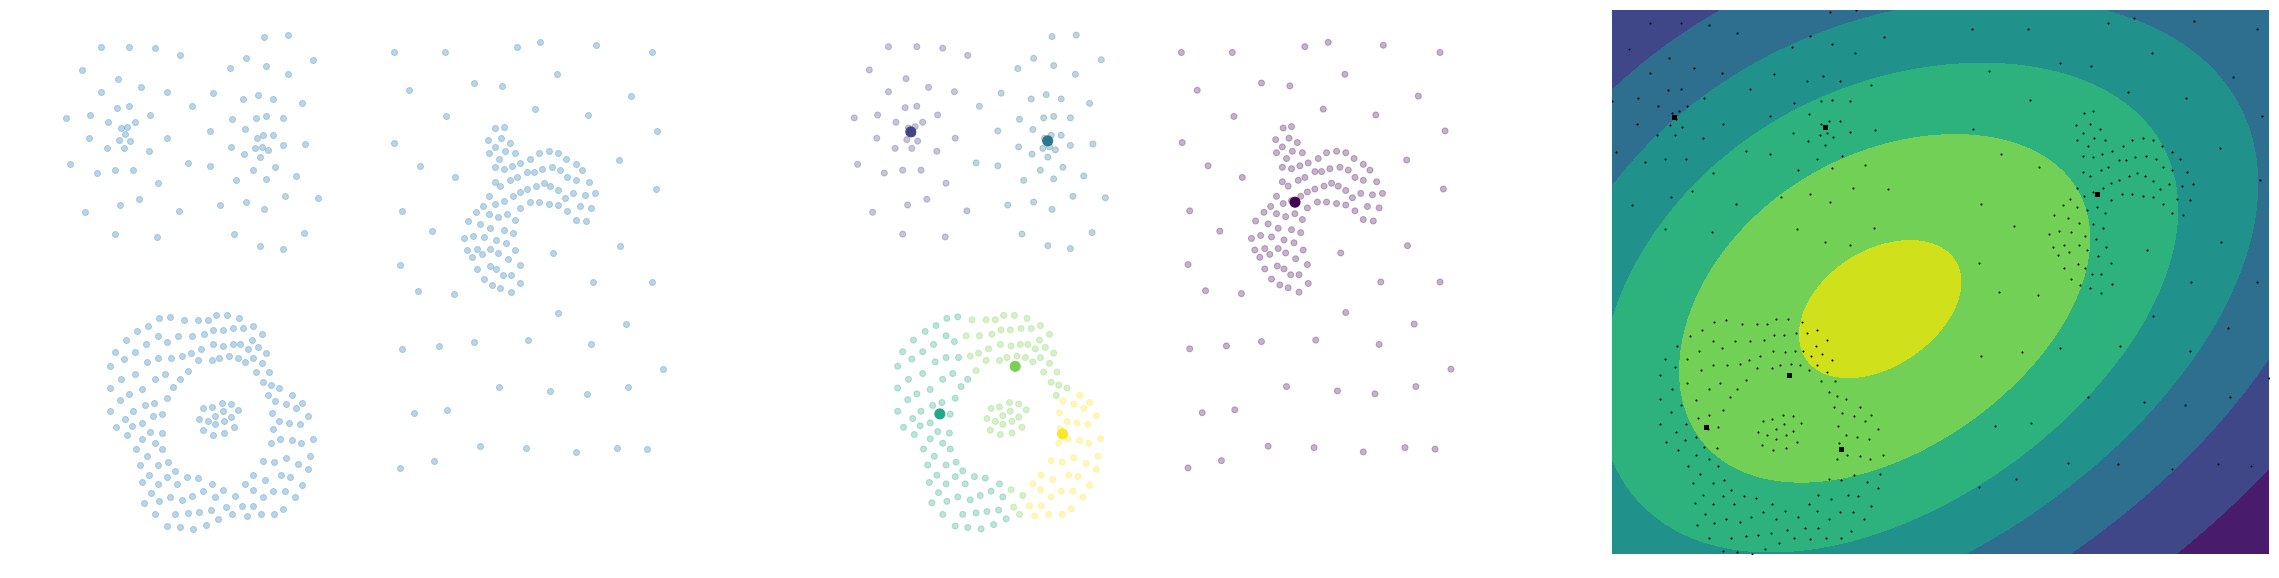

In [10]:
i=4
value = datasets[i]
ms4 = MeanShift(value, bandwidthset[i])
ms4.fit()
clusterlocations = ms4._cluster_centers
results = ms4._results
labels = ms4._cluster_labels
    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(value[:,0],value[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(value[:,0],value[:,1],alpha=.3, c = labels)
axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(value[:,0], value[:,1], bandwidthset[i])  
axarr[2].contourf(X,Y,Z)
axarr[2].plot(value[:,0], value[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')


150 iterations until termination.
used bandwidth: 7.000000
Finished after 0:00:11.759638
number of cluster found: 5.000000
max within cluster distance to center: 0.010321
mean within cluster distance to center: 0.003692
sum of within cluster squared errors: 0.022154


(11.8879, 94.458500000000001, 7.0829000000000004, 95.406500000000008)

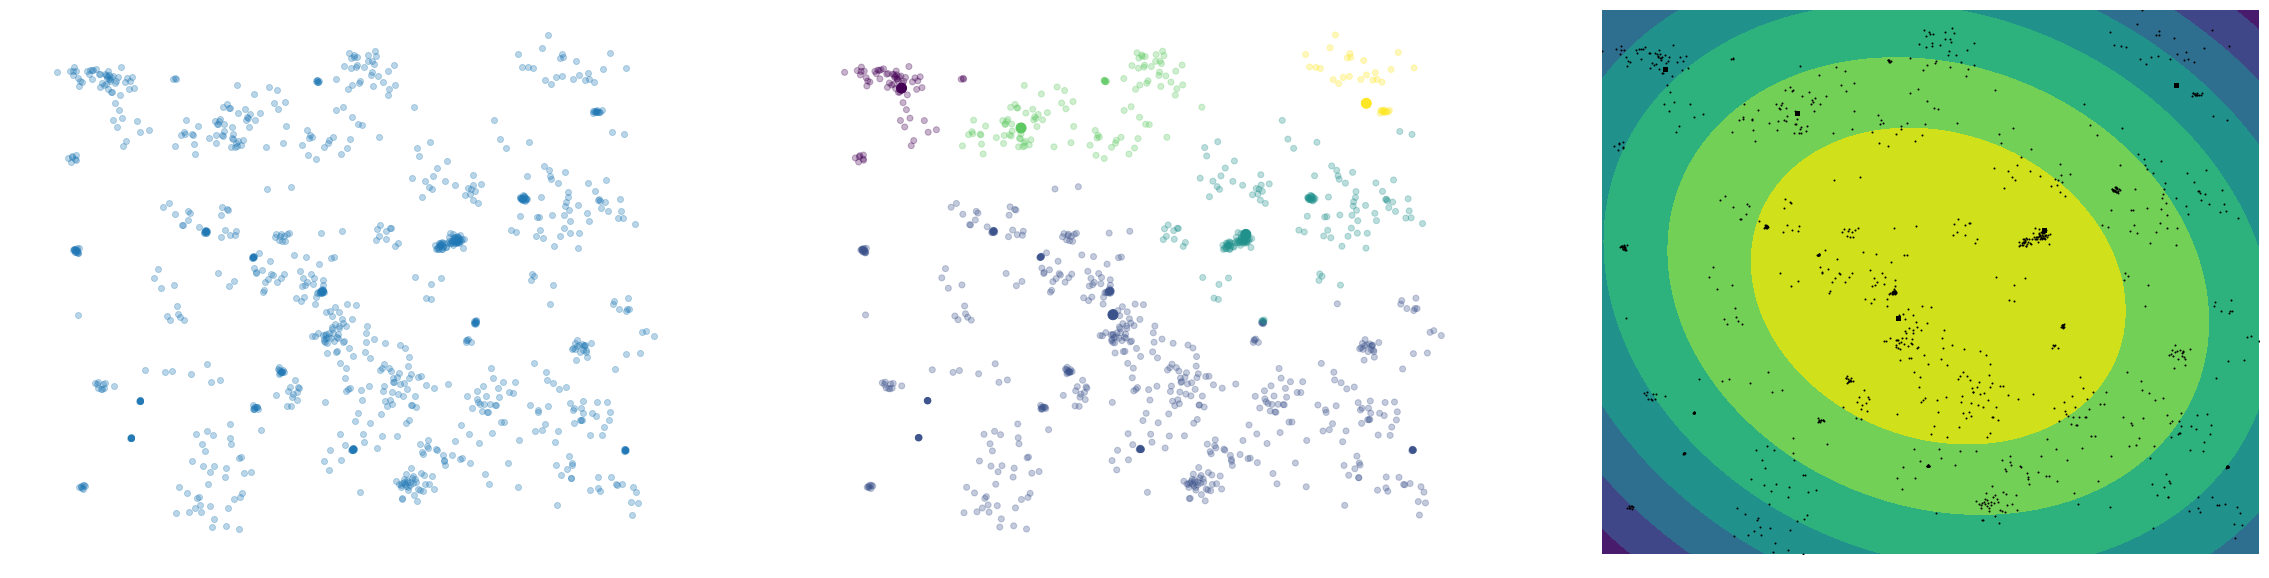

In [11]:
i=5
value = datasets[i]
ms5 = MeanShift(value, bandwidthset[i])
ms5.fit()
clusterlocations = ms5._cluster_centers
results = ms5._results
labels = ms5._cluster_labels
    
 
f, axarr = plt.subplots(1,3, figsize=(40,10))

axarr[0].scatter(value[:,0],value[:,1],alpha=.3)
axarr[0].axis('off')
    
axarr[1].scatter(value[:,0],value[:,1],alpha=.3, c = labels)
axarr[1].scatter(clusterlocations[:,0],clusterlocations[:,1],s = 100, alpha=1, c = np.arange(1,max(labels)+1))
axarr[1].axis('off')
    
[X, Y, Z] = plot_kde(value[:,0], value[:,1], bandwidthset[i])  
axarr[2].contourf(X,Y,Z)
axarr[2].plot(value[:,0], value[:,1], 'k.', markersize=2, alpha=1)
axarr[2].plot(results[:,0], results[:,1], 'k.', markersize=8)
axarr[2].axis('off')